In [ ]:
#An automated assessment of the market value of laptops based on their technical specifications, allowing for the rapid generation of a recommended listing price on the marketplace.
#The model is based on a minimum set of parameters obtained from a short questionnaire.
#Автоматическая оценка рыночной стоимости ноутбуков по их техническим характеристикам, позволяющая быстро формировать рекомендованную цену для размещения на маркетплейсе. 
#Модель должна работать на основе минимального набора параметров, получаемых из короткой анкеты.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
df = pd.read_csv("data/laptop_prices.csv")

In [52]:
df.isna().sum()

Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

In [90]:
df

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Windows 10,1.80,638.00,Full HD,1920,...,No,Intel,2.5,Core i7 6500U,128,0,SSD,No,Intel,HD Graphics 520
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Windows 10,1.30,1499.00,Quad HD+,3200,...,No,Intel,2.5,Core i7 6500U,512,0,SSD,No,Intel,HD Graphics 520
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Windows 10,1.50,229.00,Standard,1366,...,No,Intel,1.6,Celeron Dual Core N3050,64,0,Flash Storage,No,Intel,HD Graphics
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,Windows 10,2.19,764.00,Standard,1366,...,No,Intel,2.5,Core i7 6500U,1024,0,HDD,No,AMD,Radeon R5 M330


In [109]:
df_new = df[["Price_euros", "Ram", "OS", "Screen", "TypeName", "Touchscreen", "PrimaryStorage", "SecondaryStorage", "PrimaryStorageType", "SecondaryStorageType", "CPU_company", "CPU_model", "GPU_company", "GPU_model"]]
#Наиболее легкие параметры которые может указать пользователь
#The easiest parameters that can be specified by the user

In [113]:
df_new

,Price_euros,Ram,Touchscreen,PrimaryStorage,SecondaryStorage,CPU_model,GPU_model,OS_Android,OS_Chrome OS,OS_Linux,...,SecondaryStorageType_Hybrid,SecondaryStorageType_No,SecondaryStorageType_SSD,CPU_company_AMD,CPU_company_Intel,CPU_company_Samsung,GPU_company_AMD,GPU_company_ARM,GPU_company_Intel,GPU_company_Nvidia
0,1339.69,8,0,128,0,Core i5,Iris Plus Graphics 640,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,898.94,8,0,128,0,Core i5,HD Graphics 6000,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,575.00,8,0,256,0,Core i5 7200U,HD Graphics 620,0,0,0,...,0,1,0,0,1,0,0,0,1,0
3,2537.45,16,0,512,0,Core i7,Radeon Pro 455,0,0,0,...,0,1,0,0,1,0,1,0,0,0
4,1803.60,8,0,256,0,Core i5,Iris Plus Graphics 650,0,0,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,638.00,4,1,128,0,Core i7 6500U,HD Graphics 520,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1271,1499.00,16,1,512,0,Core i7 6500U,HD Graphics 520,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1272,229.00,2,0,64,0,Celeron Dual Core N3050,HD Graphics,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1273,764.00,6,0,1024,0,Core i7 6500U,Radeon R5 M330,0,0,0,...,0,1,0,0,1,0,1,0,0,0


In [111]:
df_new = pd.get_dummies(df_new, columns=["OS", "Screen", "TypeName", "PrimaryStorageType", "SecondaryStorageType", "CPU_company", "GPU_company"], dtype="int")

In [112]:
df_new = df_new.replace(["Yes", "No"], [1, 0])

C:\Users\polis\AppData\Local\Temp\ipykernel_16056\3033366787.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_new = df_new.replace(["Yes", "No"], [1, 0])


In [114]:
df_new.describe()

,Price_euros,Ram,Touchscreen,PrimaryStorage,SecondaryStorage,OS_Android,OS_Chrome OS,OS_Linux,OS_Mac OS X,OS_No OS,...,SecondaryStorageType_Hybrid,SecondaryStorageType_No,SecondaryStorageType_SSD,CPU_company_AMD,CPU_company_Intel,CPU_company_Samsung,GPU_company_AMD,GPU_company_ARM,GPU_company_Intel,GPU_company_Nvidia
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,...,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,1134.969059,8.440784,0.147451,444.517647,176.069020,0.001569,0.021176,0.045490,0.006275,0.051765,...,0.001569,0.836863,0.003137,0.047059,0.952157,0.000784,0.136471,0.000784,0.552157,0.310588
std,700.752504,5.097809,0.354694,365.537726,415.960655,0.039590,0.144029,0.208458,0.078994,0.221639,...,0.039590,0.369636,0.055945,0.211848,0.213518,0.028006,0.343422,0.028006,0.497467,0.462916
min,174.000000,2.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,609.000000,4.000000,0.000000,256.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,989.000000,8.000000,0.000000,256.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1496.500000,8.000000,0.000000,512.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6099.000000,64.000000,1.000000,2048.000000,2048.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


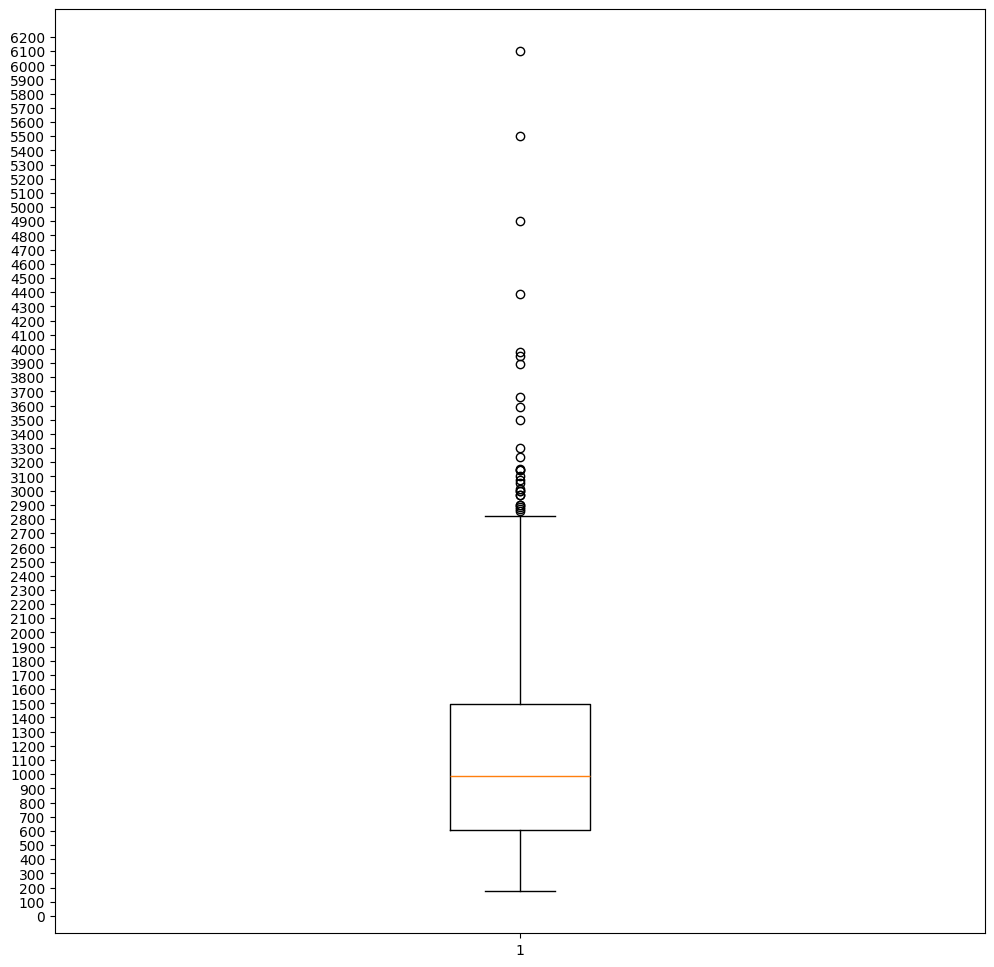

In [115]:
plt.figure(figsize=(12,12))
plt.boxplot(x=df_new["Price_euros"])
plt.yticks(ticks=np.arange(0, 6300, 100))
plt.show()

In [116]:
df_new.drop(columns=["CPU_model", "GPU_model"]).corr()

,Price_euros,Ram,Touchscreen,PrimaryStorage,SecondaryStorage,OS_Android,OS_Chrome OS,OS_Linux,OS_Mac OS X,OS_No OS,...,SecondaryStorageType_Hybrid,SecondaryStorageType_No,SecondaryStorageType_SSD,CPU_company_AMD,CPU_company_Intel,CPU_company_Samsung,GPU_company_AMD,GPU_company_ARM,GPU_company_Intel,GPU_company_Nvidia
Price_euros,1.000000,0.740287,0.188886,-0.124775,0.291207,-0.039665,-0.122080,-0.159911,0.014509,-0.182452,...,0.105251,-0.305780,0.022907,-0.182090,0.183163,-0.019037,-0.202575,-0.019037,-0.181662,0.346656
Ram,0.740287,1.000000,0.111622,0.015365,0.390939,-0.034542,-0.104661,-0.092747,0.000923,-0.092460,...,0.121025,-0.403358,0.083219,-0.106440,0.108809,-0.024415,-0.095363,-0.024415,-0.321374,0.417584
Touchscreen,0.188886,0.111622,1.000000,-0.025798,-0.135244,0.095310,0.077113,-0.080173,-0.033046,-0.097168,...,-0.016484,0.147696,0.016226,-0.092417,0.082858,0.067368,-0.145996,0.067368,0.254429,-0.169185
PrimaryStorage,-0.124775,0.015365,-0.025798,1.000000,-0.244182,-0.041278,-0.155083,0.134139,-0.030558,0.160691,...,-0.006565,0.257164,-0.009291,0.097520,-0.092608,-0.031630,0.146076,-0.031630,-0.112698,0.014654
SecondaryStorage,0.291207,0.390939,-0.135244,-0.244182,1.000000,-0.016784,-0.062284,-0.055364,-0.033648,-0.064064,...,0.080831,-0.959073,0.019419,-0.030251,0.031570,-0.011864,0.034221,-0.011864,-0.444983,0.453526
OS_Android,-0.039665,-0.034542,0.095310,-0.041278,-0.016784,1.000000,-0.005830,-0.008653,-0.003150,-0.009261,...,-0.001571,0.017500,-0.002224,-0.008808,0.008885,-0.001110,-0.015757,-0.001110,0.035697,-0.026604
OS_Chrome OS,-0.122080,-0.104661,0.077113,-0.155083,-0.062284,-0.005830,1.000000,-0.032110,-0.011688,-0.034366,...,-0.005830,0.064942,-0.008251,-0.032686,0.007447,0.190476,-0.058473,0.190476,0.121511,-0.098725
OS_Linux,-0.159911,-0.092747,-0.080173,0.134139,-0.055364,-0.008653,-0.032110,1.000000,-0.017347,-0.051007,...,-0.008653,0.065827,-0.012247,-0.048513,0.048936,-0.006116,0.132501,-0.006116,-0.053174,-0.040785
OS_Mac OS X,0.014509,0.000923,-0.033046,-0.030558,-0.033648,-0.003150,-0.011688,-0.017347,1.000000,-0.018566,...,-0.003150,0.035084,-0.004458,-0.017658,0.017812,-0.002226,-0.031589,-0.002226,0.071563,-0.053335
OS_No OS,-0.182452,-0.092460,-0.097168,0.160691,-0.064064,-0.009261,-0.034366,-0.051007,-0.018566,1.000000,...,-0.009261,0.064835,-0.013107,-0.018487,0.019201,-0.006546,-0.031010,-0.006546,-0.024506,0.049736


In [ ]:
#"RAM" "SecondaryStorage" "Screen_4K Ultra HD" "TypeName_Gaming" "PrimaryStorageType_SSD" "SecondaryStorageType_HDD" "GPU_company_Nvidia"

In [123]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error, mean_squared_error

In [120]:
X= df_new.drop(columns=["Price_euros", "CPU_model", "GPU_model"])
y= df_new[["Price_euros"]]

In [121]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.2, random_state=42)

In [140]:
def get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, pred)
    return mae

def get_rmse(max_leaf_nodes, X_train, X_test, y_train, y_test):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    rmse = root_mean_squared_error(y_test, pred)
    return rmse

In [ ]:
for max_leaf_nodes in [46, 48, 50, 52]:
    mae = get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test)
    rmse = get_rmse(max_leaf_nodes, X_train, X_test, y_train, y_test)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, mae))
    print("Max leaf nodes: %d  \t\t Root Mean Squared Error:  %d" %(max_leaf_nodes, rmse))

Max leaf nodes: 46  		 Mean Absolute Error:  260
Max leaf nodes: 46  		 Root Mean Squared Error:  374
Max leaf nodes: 48  		 Mean Absolute Error:  258
Max leaf nodes: 48  		 Root Mean Squared Error:  373
Max leaf nodes: 50  		 Mean Absolute Error:  256
Max leaf nodes: 50  		 Root Mean Squared Error:  370
Max leaf nodes: 51  		 Mean Absolute Error:  256
Max leaf nodes: 51  		 Root Mean Squared Error:  371


In [146]:
model = DecisionTreeRegressor(max_leaf_nodes=50, random_state=0)
model.fit(X_scaler, y)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,50
,min_impurity_decrease,0.0
,ccp_alpha,0.0
